#### Unit 6 | Assignment-WeatherPy
######            What's the weather like as we approach the equator?


In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:
* Temperature(F) vs. Latitude * Humidity(%) vs. Latitud  * Cloudiness(%) vs. Latitude * Wind Speed(mph) vs. Latitude

Your final notebook must:
* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use Matplotlib to create your plots.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

#### Hints and Considerations

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

# Walsh Weather
### Observations:
1.

2.

3.


In [21]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
#import random
import time
#import openweathermapy.core as owm
#from citipy import citipy

In [22]:
#Creating cities by setting rectangle groupings; didn't pull many with initial try. 

#api_key = "d4c7fc687a3ecaf9670515da999f1a2b"
#base_url= "http://api.openweathermap.org/data/2.5/box/city?bbox=-180,-90,180,90" #-- only pulled 465 total cities. 
# bbox=-180,-90,180,-60"
# bbox=-180,-60,180,-45"
# bbox=-180,-45,180,-30"
# bbox=-180,-30,180,-15"
# bbox=-180,-15,180,0"
#units ="imperial"


#query_url = base_url + "&appid=" + api_key + "&units="+ units
#response = requests.get(query_url).json()
#response
#response_df = pd.DataFrame(response)

In [23]:
#Selecting cities from complete list of cities available from openweathermaps  http://bulk.openweathermap.org/sample/
raw_data =pd.read_json("city_list.json")
raw_city_list= raw_data[["name",'id',"country", "coord"]]
raw_city_list.head()
#new = raw_city_list["coord"]




,name,id,country,coord
0,Hurzuf,707860,UA,"{'lon': 34.283333, 'lat': 44.549999}"
1,Novinki,519188,RU,"{'lon': 37.666668, 'lat': 55.683334}"
2,Gorkhā,1283378,NP,"{'lon': 84.633331, 'lat': 28}"
3,State of Haryāna,1270260,IN,"{'lon': 76, 'lat': 29}"
4,Holubynka,708546,UA,"{'lon': 33.900002, 'lat': 44.599998}"


In [24]:
# Get and store target url for each city in list by city name
base_url= "http://api.openweathermap.org/data/2.5/weather"
api_key = "d4c7fc687a3ecaf9670515da999f1a2b"
units ="imperial"

#Testing
#target_url = base_url + "?appid=" + api_key + "&units="+ units +"&id=" + "708546"
#response = requests.get(target_url).json()
#response


In [25]:
#create loop to hold target url with counters and data frame

count= 0
group = 1

#empty df created to store data. Lat and long pulled from api not original list of cities.
weather_df = pd.DataFrame(columns = ["Name","Latitude","Longitude","Max Temp", "Humidity","Cloudiness","Wind Speed", "Date"])


for x in range(12):
    sample_list = raw_city_list["id"].sample(60).tolist() #.sample pulls random sample from list.batched 60 because documentation specified 60 per minute. 
    
    for x in sample_list:
        print(f"Processing Record {count} of Set {group}")
        target_url = base_url + "?appid=" + api_key + "&units="+ units +"&id=" + str(x)
        response = requests.get(target_url).json()
        name= response["name"]
        temp = response["main"]["temp_max"]
        clouds = response["clouds"]["all"]
        humidity = response["main"]["humidity"]
        wind = response["wind"]["speed"]
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        date = response["dt"]
        weather_df =weather_df.append({"Name":name,"Latitude":lat,"Longitude":lon,"Max Temp":temp, "Humidity":humidity,"Cloudiness":clouds,"Wind Speed":wind,"Date":date}, ignore_index=True)
        print(target_url)
        count +=1
    # add set number to batches    
    group +=1
    #time.sleep(62)  # documents said 60 per minute, but doesn't seem to need lag


Processing Record 0 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5129832
Processing Record 1 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2816660
Processing Record 2 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2977777
Processing Record 3 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=106297
Processing Record 4 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=670425
Processing Record 5 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6616117
Processing Record 6 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=489059
Processing Recor

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=4459298
Processing Record 59 of Set 1
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6074375
Processing Record 60 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6553442
Processing Record 61 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=306112
Processing Record 62 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5703673
Processing Record 63 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5958726
Processing Record 64 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1969936
Processing Record 65 of Set 2
http://

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=489288
Processing Record 117 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3532263
Processing Record 118 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=674733
Processing Record 119 of Set 2
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6357508
Processing Record 120 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8012435
Processing Record 121 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3124775
Processing Record 122 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6085706
Processing Record 123 of Set 3
h

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3007535
Processing Record 175 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6551344
Processing Record 176 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2902768
Processing Record 177 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2779274
Processing Record 178 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1798443
Processing Record 179 of Set 3
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3004630
Processing Record 180 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2827040
Processing Record 181 of Set 4

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2036519
Processing Record 233 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1256343
Processing Record 234 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7036284
Processing Record 235 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2945591
Processing Record 236 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=473661
Processing Record 237 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2488742
Processing Record 238 of Set 4
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2874937
Processing Record 239 of Set 4


http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7287030
Processing Record 291 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2646700
Processing Record 292 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3460235
Processing Record 293 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1808977
Processing Record 294 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3170131
Processing Record 295 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1919775
Processing Record 296 of Set 5
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6121621
Processing Record 297 of Set 5

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2651236
Processing Record 349 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1796824
Processing Record 350 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3056108
Processing Record 351 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2686469
Processing Record 352 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3051829
Processing Record 353 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5158156
Processing Record 354 of Set 6
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2485633
Processing Record 355 of Set 6

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6554999
Processing Record 407 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2524160
Processing Record 408 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8012350
Processing Record 409 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5095808
Processing Record 410 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6542315
Processing Record 411 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2654450
Processing Record 412 of Set 7
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3249078
Processing Record 413 of Set 7

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5374871
Processing Record 465 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3667660
Processing Record 466 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=154654
Processing Record 467 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1222192
Processing Record 468 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=294824
Processing Record 469 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=8197234
Processing Record 470 of Set 8
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2638902
Processing Record 471 of Set 8
h

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6692918
Processing Record 523 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6435108
Processing Record 524 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3446880
Processing Record 525 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1448087
Processing Record 526 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2833034
Processing Record 527 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6439139
Processing Record 528 of Set 9
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2863038
Processing Record 529 of Set 9

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3458330
Processing Record 581 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6619866
Processing Record 582 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6359320
Processing Record 583 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=669154
Processing Record 584 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3060219
Processing Record 585 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6361810
Processing Record 586 of Set 10
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3471848
Processing Record 587 of 

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2947092
Processing Record 638 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6613396
Processing Record 639 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1720751
Processing Record 640 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2940744
Processing Record 641 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=701650
Processing Record 642 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2987537
Processing Record 643 of Set 11
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=7838920
Processing Record 644 of 

http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=6555745
Processing Record 695 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=1172295
Processing Record 696 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=668569
Processing Record 697 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=3121569
Processing Record 698 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2514032
Processing Record 699 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=2414544
Processing Record 700 of Set 12
http://api.openweathermap.org/data/2.5/weather?appid=d4c7fc687a3ecaf9670515da999f1a2b&units=imperial&id=5955956
Processing Record 701 of 

In [34]:
weather_df.nunique()

Name          718
Latitude      647
Longitude     675
Max Temp      224
Humidity       66
Cloudiness     22
Wind Speed    122
Date          209
dtype: int64

In [35]:
weather_df.head()

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Oneida County,43.20,-75.47,35.6,93,90,12.75,1510890840
1,Volkershausen,50.80,10.05,39.2,93,75,12.75,1510890600
2,Saint-Paer,49.51,0.88,50.0,100,90,1.12,1510891200
3,Ḩafar al Bāţin,28.43,45.97,53.6,62,0,2.93,1510887600
4,Plopu,45.02,26.15,41.0,93,90,11.41,1510891200


In [36]:
# Collect x and y coordinates
#Lat vs temp
x_axis_lat =weather_df["Latitude"]
y_axis_temp =weather_df["Max Temp"]
# Lat vs Humidity
x_axis_lat =weather_df["Latitude"]
y_axis_humidity=weather_df["Humidity"]
#Lat vs Cloudiness
x_axis_lat =weather_df["Latitude"]
y_axis_cloudiness =weather_df["Cloudiness"]
#Lat vs Wind Speed
x_axis_lat =weather_df["Latitude"]
y_axis_windspeed =weather_df["Wind Speed"]

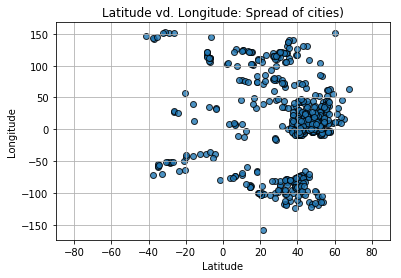

In [37]:
plt.scatter(weather_df["Latitude"], 
            weather_df["Longitude"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.title("Latitude vd. Longitude: Spread of cities)")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

# Save Figure
plt.savefig("temperature.png")

plt.plot()
plt.show()

###  Latitude vs. Temperature

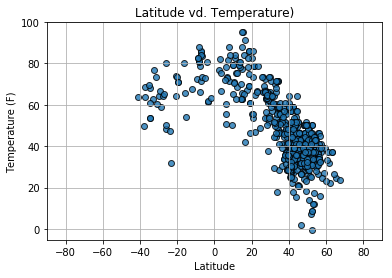

In [38]:


plt.scatter(x_axis_lat, 
            y_axis_temp, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Temperature)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

# Save Figure
plt.savefig("temperature.png")

# Show plot
plt.show()

### Latitude vs. Humidity

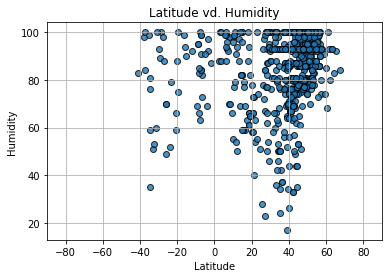

In [39]:
plt.scatter(x_axis_lat, 
            y_axis_humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")


plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

# Save Figure
plt.savefig("humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness

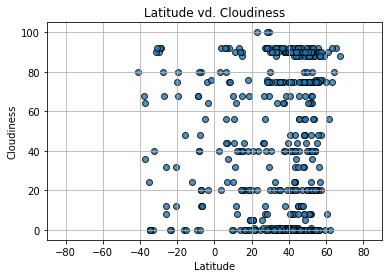

In [40]:
plt.scatter(x_axis_lat, 
            y_axis_cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

# Save Figure
plt.savefig("cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed

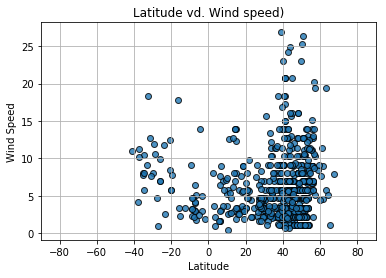

In [41]:
plt.scatter(x_axis_lat, 
            y_axis_windspeed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.title("Latitude vs. Wind speed)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)

# Save Figure
plt.savefig("wind speed.png")

# Show plot
plt.show()